In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df
## Dataset has 30,000 rows and 25 features
## Label is feature 'default.payment.next.month' which holds values of 0 or 1. Classification problem.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
## No null values have been found
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
## Analyzing data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


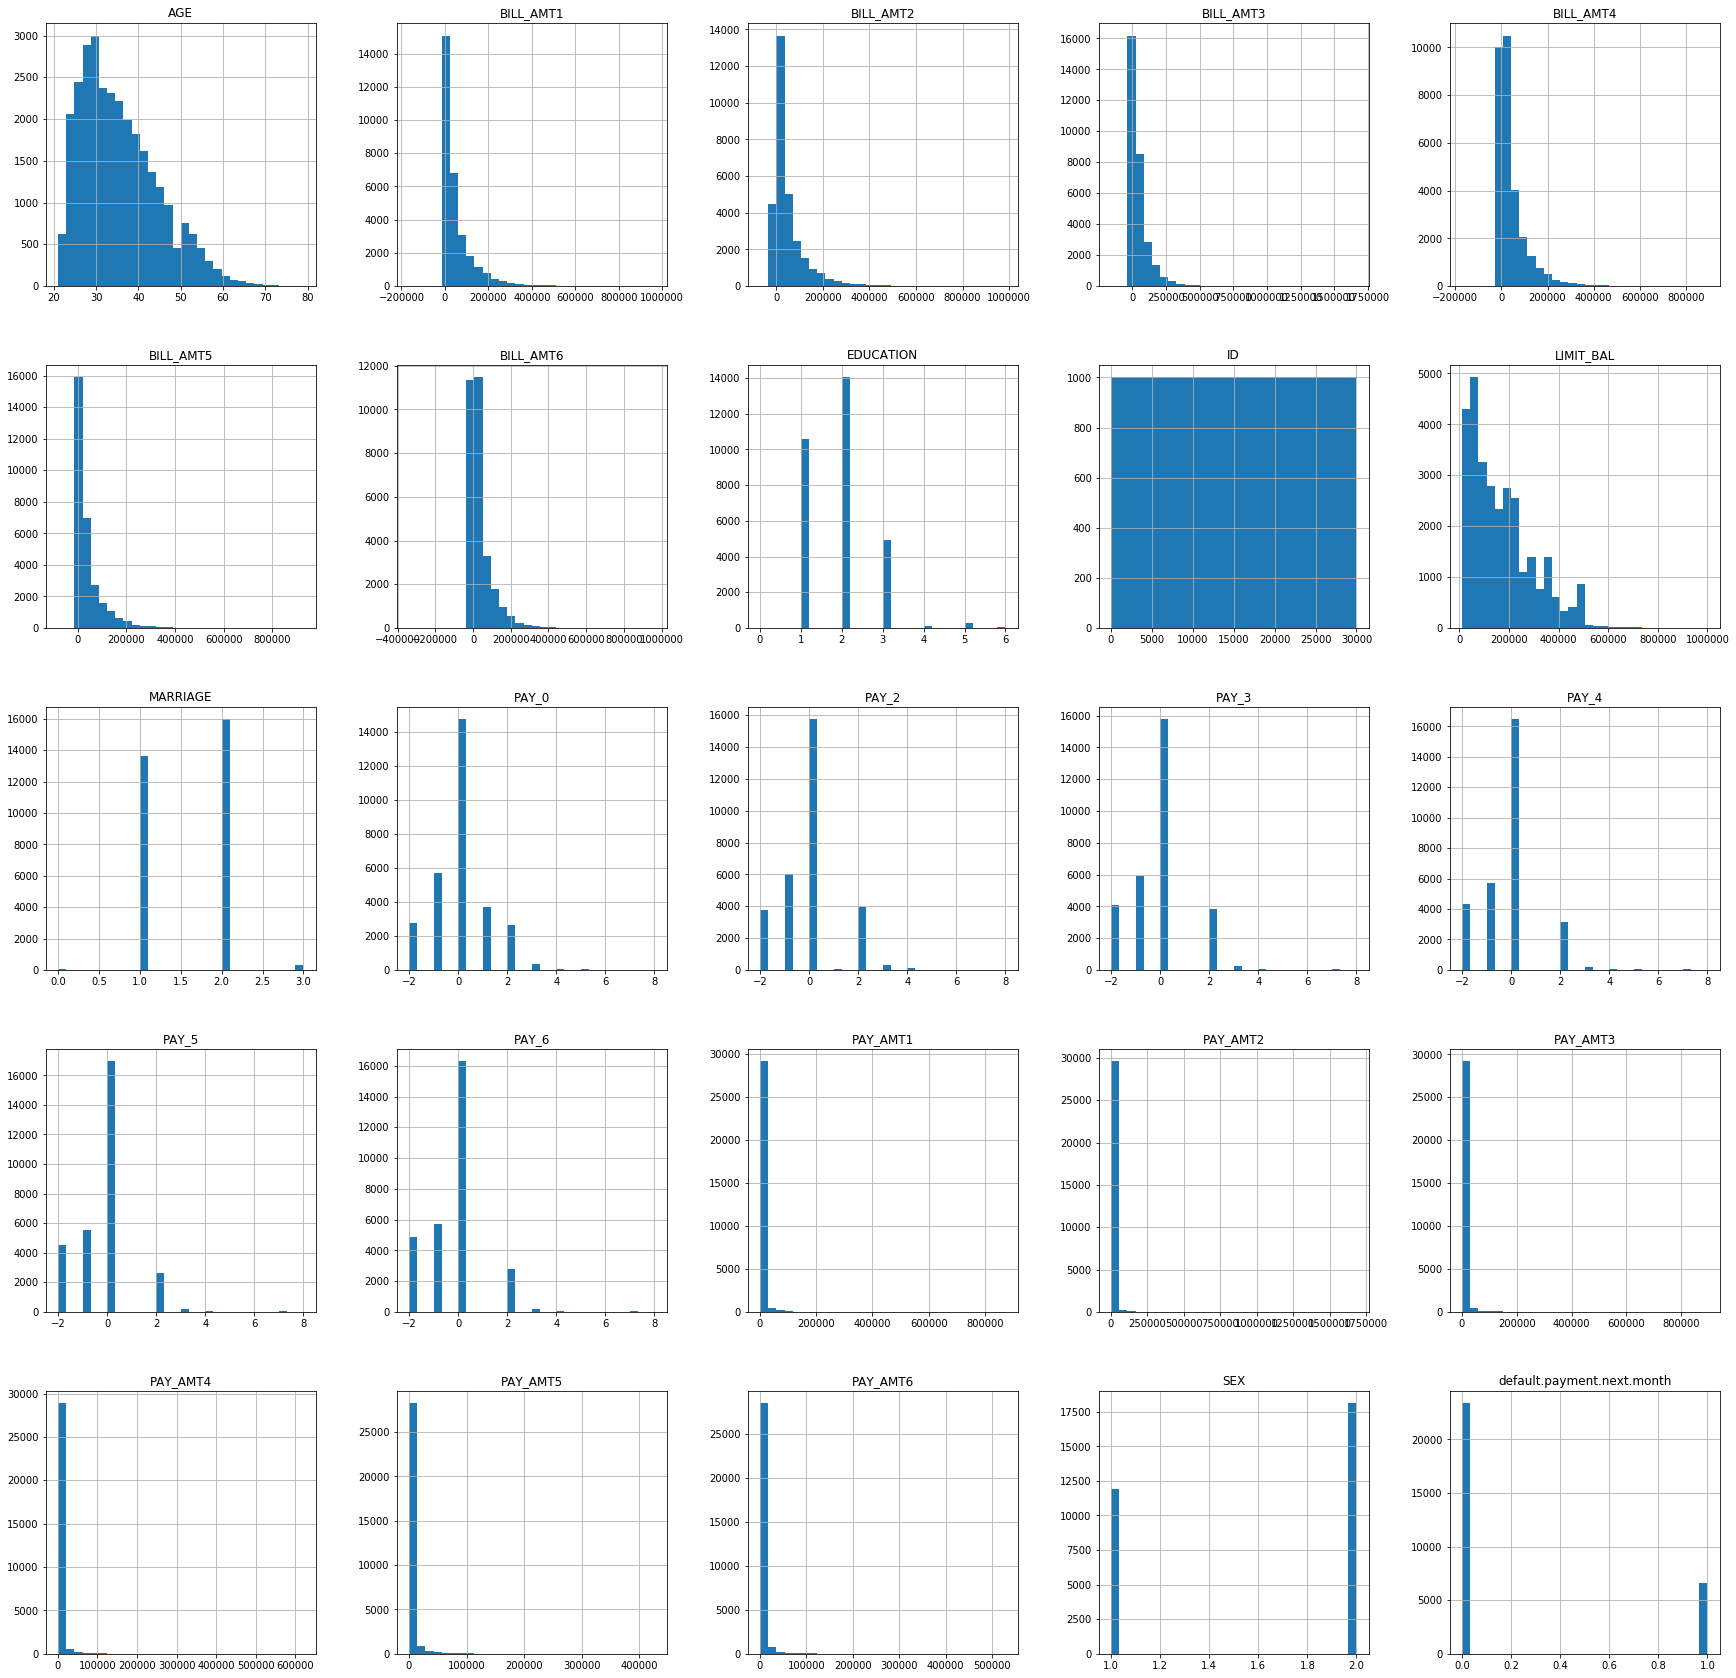

In [13]:
## Visualizing the data
df.hist(figsize = (30,30), bins = 30)
plt.show()

In [14]:
## Dropping ID column due to it being a non important feature. Visualizing it doesn't give us any information either
df.drop(columns = ['ID'], axis = 1, inplace = True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [23]:
## Checking number and percentage of customers that defaulted vs not to check for dataset balance
print("Number of Customers that defaulted: {} | Percentage: {:.2f}".format(len(df[df['default.payment.next.month'] == 1]), (len(df[df['default.payment.next.month'] == 1]) / 30000) * 100))
print("Number of Customers that did not defaulted: {} | Percentage: {:.2f}".format(len(df[df['default.payment.next.month'] == 0]), (len(df[df['default.payment.next.month'] == 0]) / 30000) * 100))

Number of Customers that defaulted: 6636 | Percentage: 22.12
Number of Customers that did not defaulted: 23364 | Percentage: 77.88


In [24]:
defaulted_df = df[df['default.payment.next.month'] == 1]
defaulted_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [25]:
not_defaulted_df = df[df['default.payment.next.month'] == 0]
not_defaulted_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


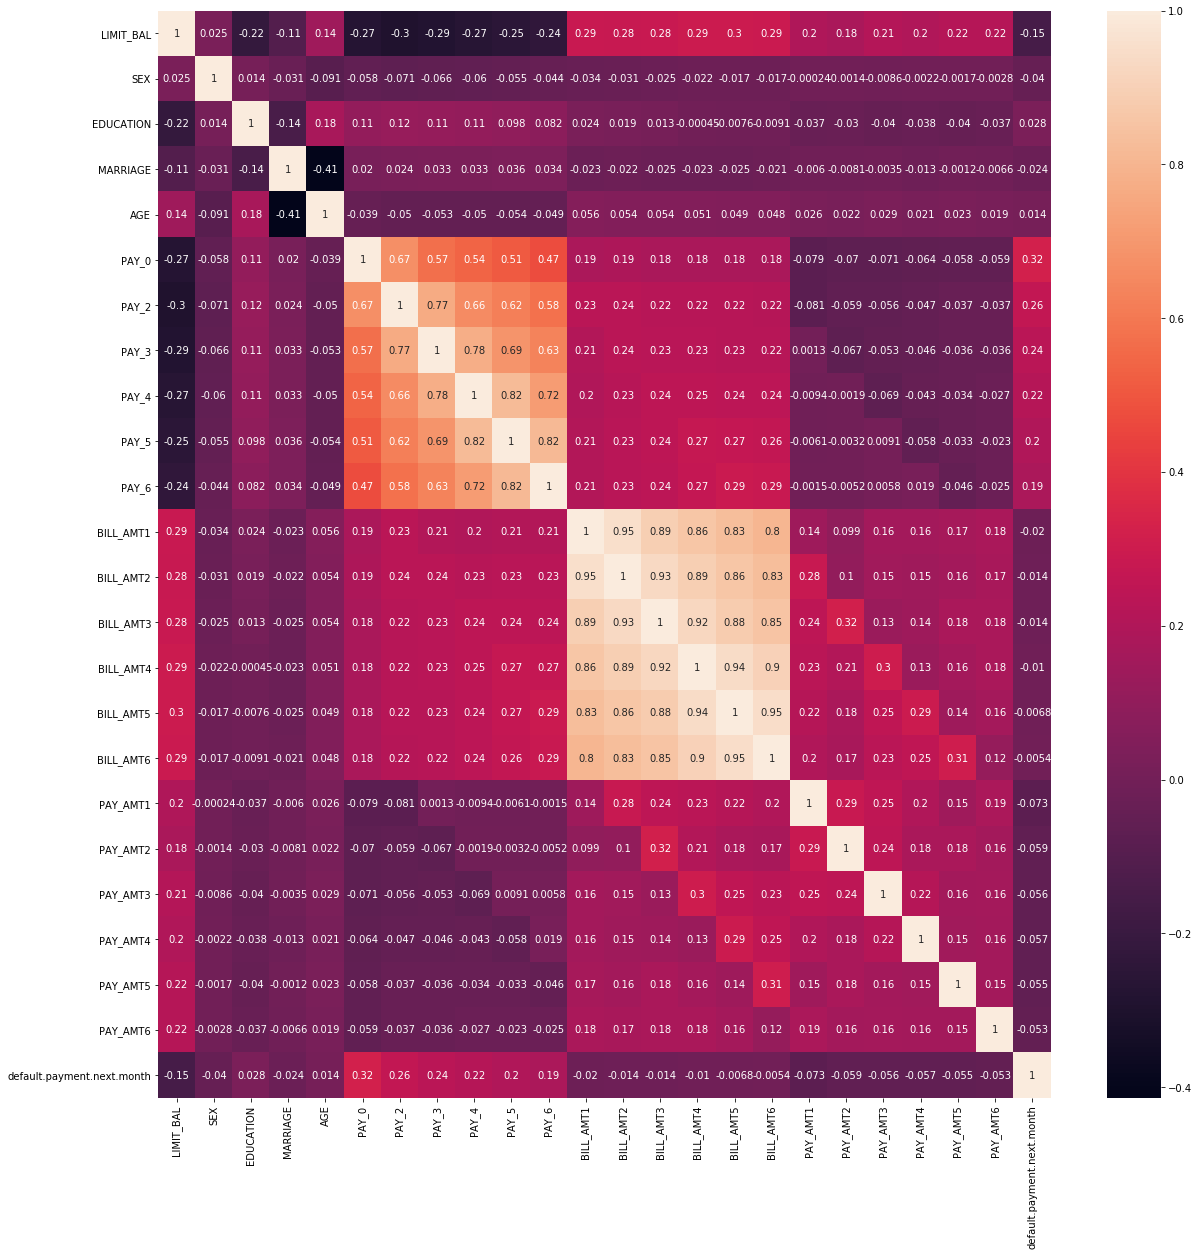

In [28]:
## Checking out correlation of features
fig = plt.figure(figsize= (20, 20))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.show()

## Generally the correlations between features are within reason. There seems to be high correlations between 
## the PAY_0-6 and BILL_AMT1-6. When training model either one of these features can be chosen. But in general one of these features can be dropped

## Will be performing some data exploration to see if I can make some high level conclusions

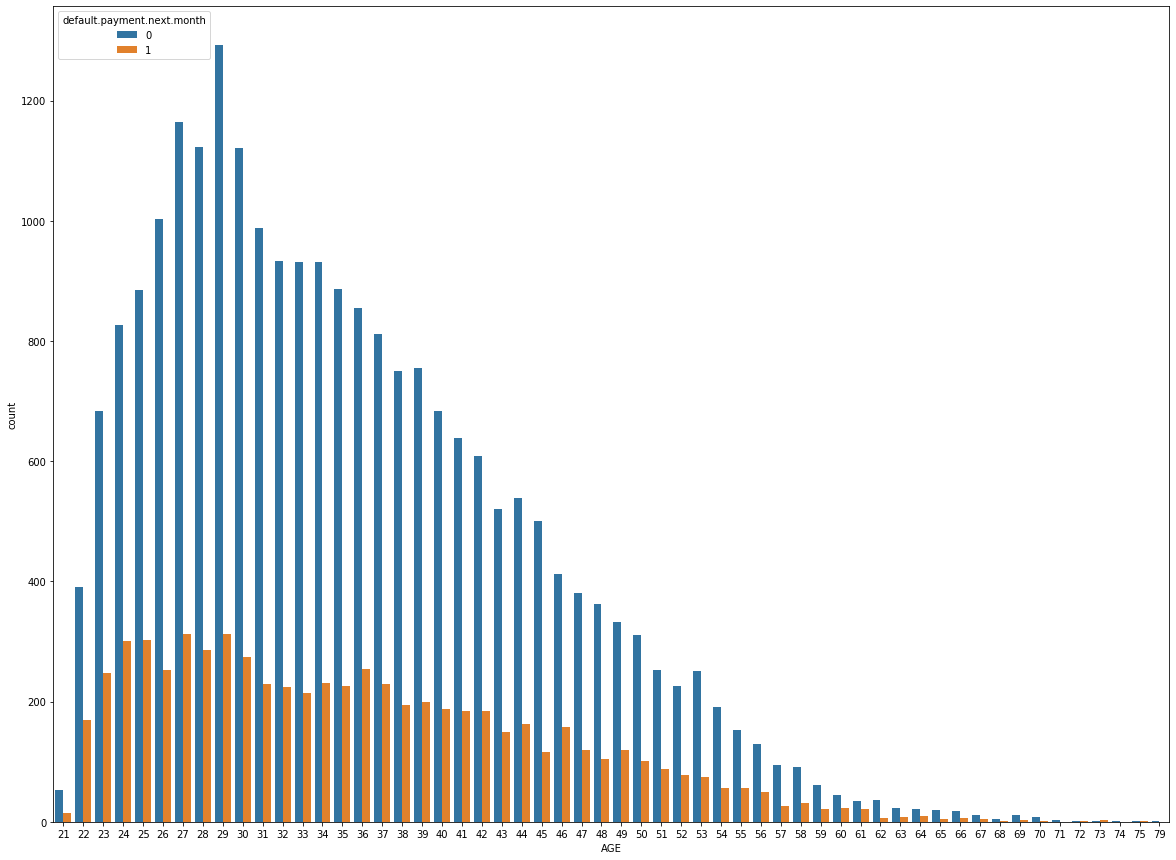

In [33]:
## Plotting age and default values together
fig = plt.figure(figsize = (20, 15))
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = df)
plt.show()

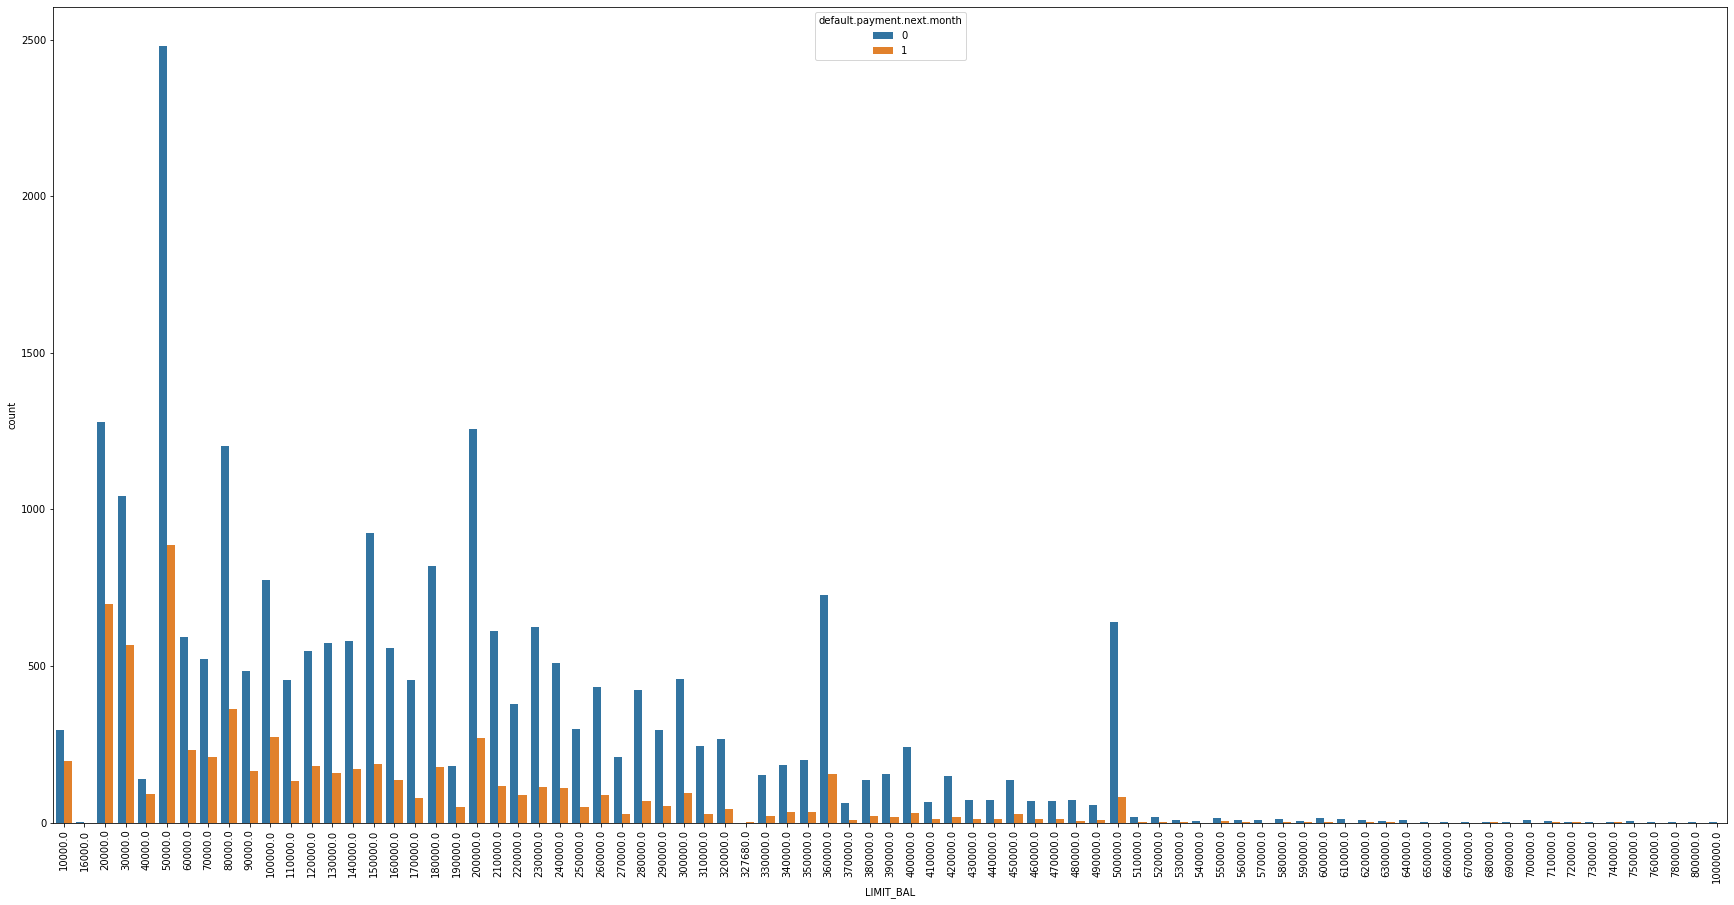

In [37]:
## Plotting limit balance and default values together
fig = plt.figure(figsize = (30, 15))
sns.countplot(x = 'LIMIT_BAL', hue = 'default.payment.next.month', data = df)
plt.xticks(rotation = 90)
plt.show()

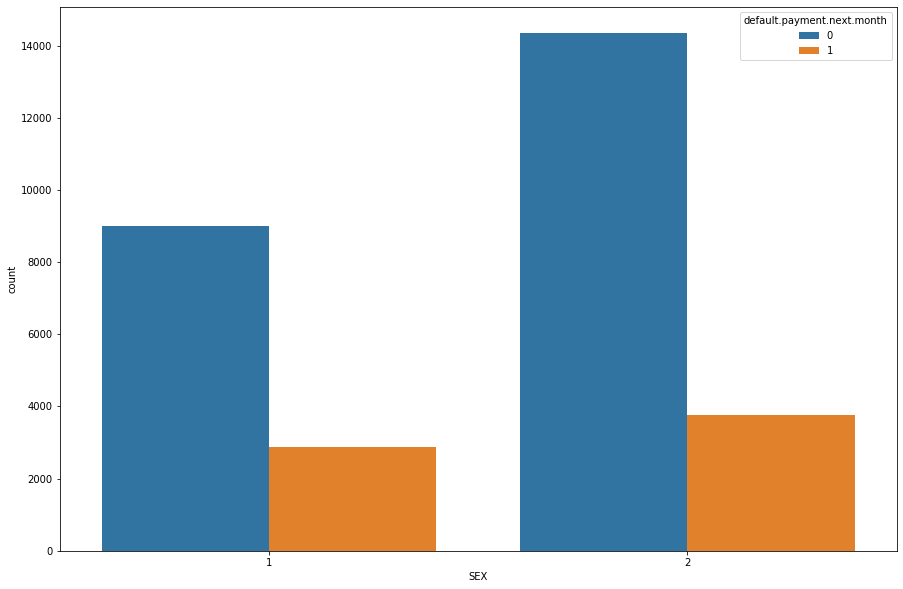

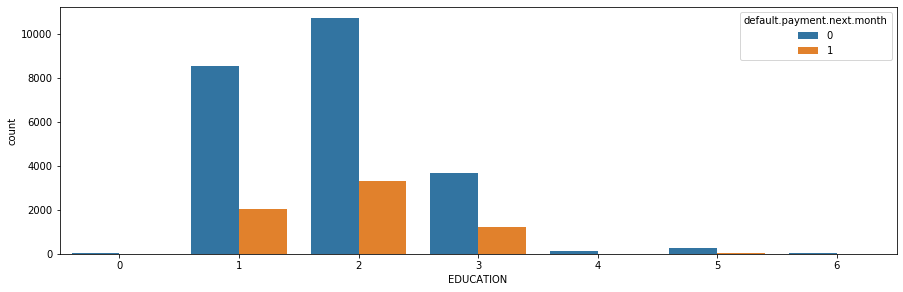

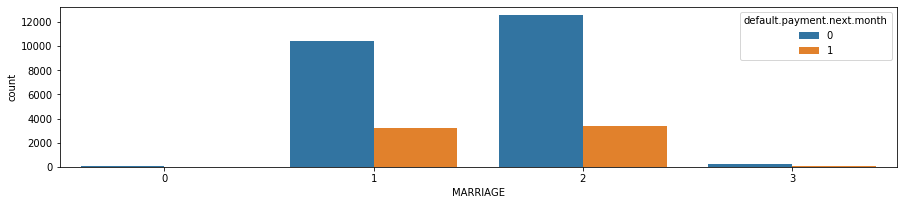

In [85]:
## Will explore some other variables vs defaulting
plt.figure(figsize= (15, 10))
plt.subplot(111)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = df)
#plt.show()
plt.figure(figsize= (15, 10))
plt.subplot(212)
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = df)
#plt.show()
plt.figure(figsize= (15, 10))
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = df)
#plt.show()

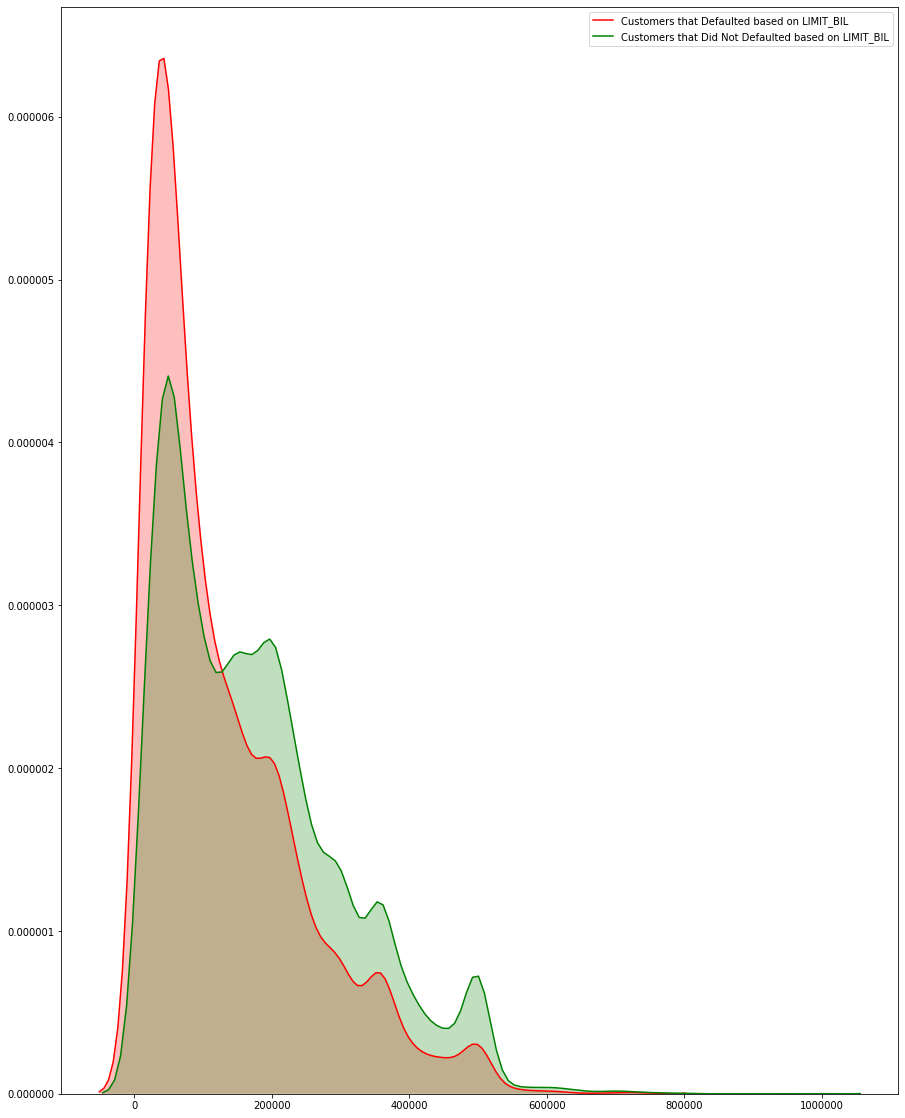

In [69]:
## Analyzing the kernel density estimate of people who defaulted and not defaulted by focusing the limit balance
plt.figure(figsize = (15,20))

sns.kdeplot(defaulted_df['LIMIT_BAL'], color = 'r', shade = True, label = "Customers that Defaulted based on LIMIT_BIL")
sns.kdeplot(not_defaulted_df['LIMIT_BAL'], color = 'g', shade = True, label = "Customers that Did Not Defaulted based on LIMIT_BIL")
plt.show()

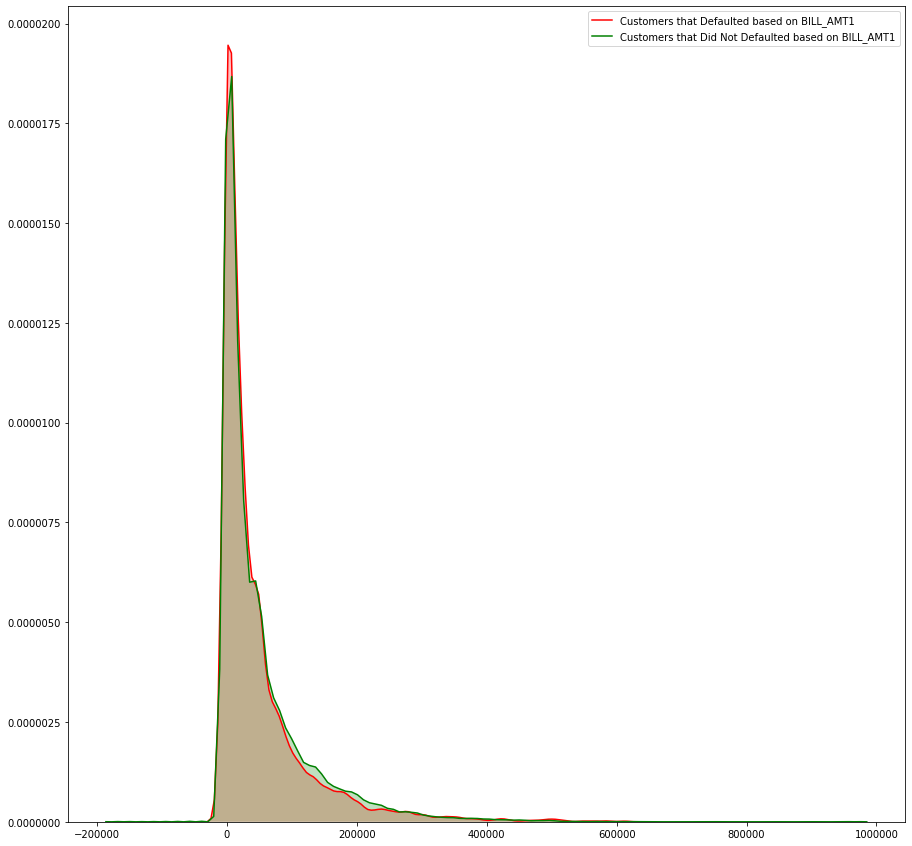

In [68]:
plt.figure(figsize = (15,15))

sns.kdeplot(defaulted_df['BILL_AMT1'], color = 'r', shade = True, label = "Customers that Defaulted based on BILL_AMT1")
sns.kdeplot(not_defaulted_df['BILL_AMT1'], color = 'g', shade = True, label = "Customers that Did Not Defaulted based on BILL_AMT1")
plt.show()

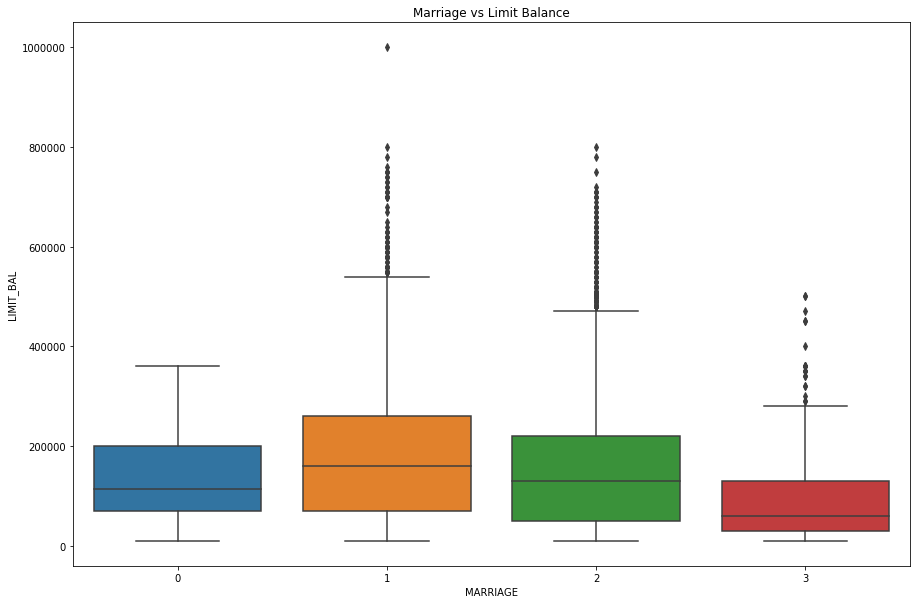

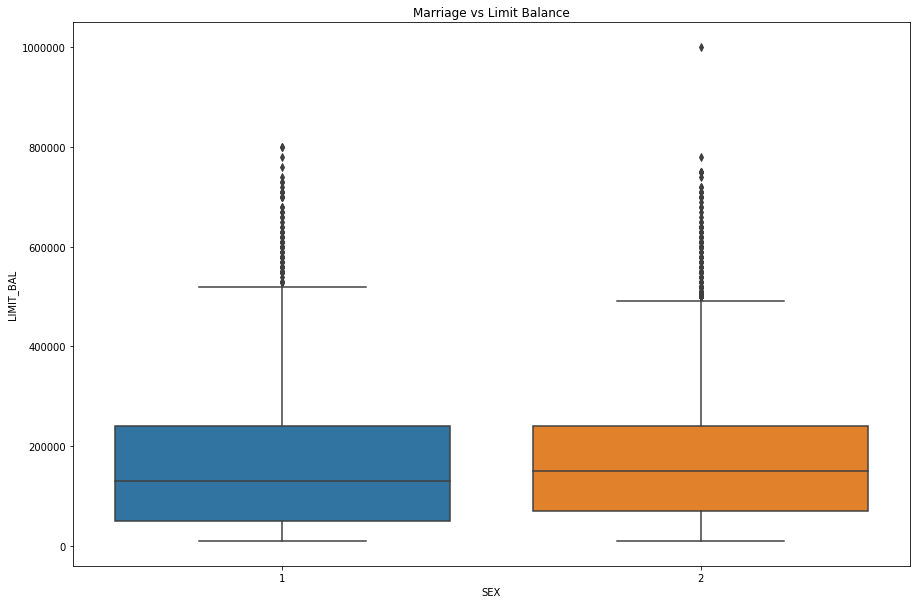

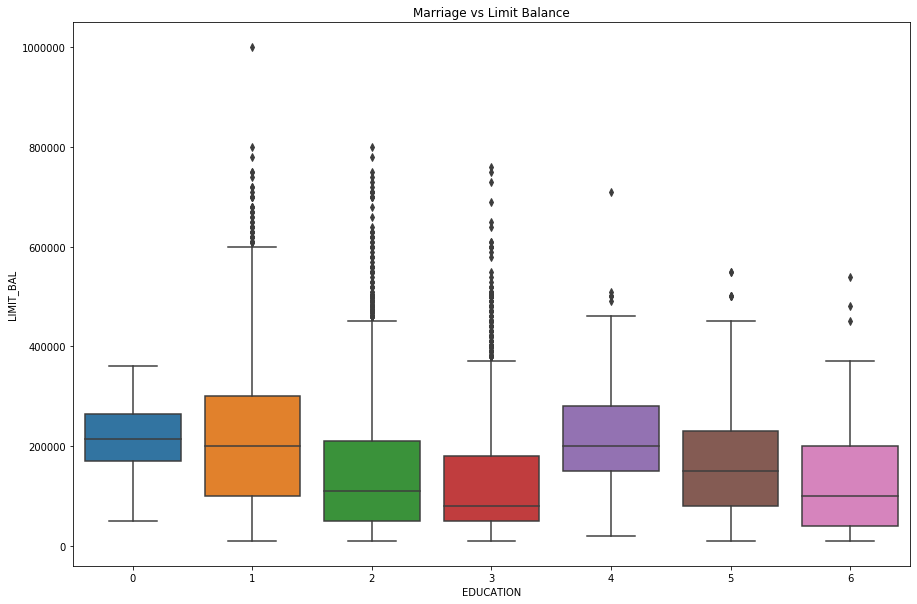

In [88]:
## Looking at box plots for the data
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = df)
plt.title('Marriage vs Limit Balance')
plt.show()
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = df)
plt.title('Marriage vs Limit Balance')
plt.show()
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', data = df)
plt.title('Marriage vs Limit Balance')
plt.show()

## Perform some data cleaning